In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator
import abc
import rl_module as rl

plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11, 7),
}
plt.rcParams.update(params)

In [3]:
rl.Agent

rl_module.agent.Agent

### Set Bob, the agent

In [4]:
Bob = rl.Agent()
init_state = (0,0)
Bob.state = init_state
Bob.summary()

Current state : (0, 0)
State history : [(0, 0)]
Total reward  : 0


### Basic Gridworld

In [5]:
n_h, n_v = 10, 10
terminal_state = (n_h-1, n_v-1)
Env = rl.BasicGridworld(n_h, n_v, terminal_state=terminal_state)
#Env.summary()

In [6]:
Env.actionStateMap(init_state)

{'right': (1, 0), 'up': (0, 1)}

In [7]:
N_EPOCHS = 100

policy_params = {
    'policy_name': 'EpsilonGreedy',
    'epsilon': 0.1
}

agent_params = {
    'state': init_state
}

exp_replay_params = {
    'do_exp_replay': True,
    'exp_replay_buffer_size': 10,
    'exp_replay_batch_size': 5,
}

params = {
    'policy_params': policy_params,
    'agent_params': agent_params,
    'exp_replay': exp_replay_params,
    'learning_rate': 0.5,
    'discount_factor': 1,
}

params_no_exp_replay = {
    'policy_params': policy_params,
    'agent_params': agent_params,
    'learning_rate': 0.5,
    'discount_factor': 1,
}

Sarsa_RL = rl.Sarsa(Agent=Bob, Environment=Env, params=params)
Q_RL = rl.QLearning(Agent=Bob, Environment=Env, params=params)

Sarsa_RL_no_exp_replay = rl.Sarsa(Agent=Bob, Environment=Env, params=params_no_exp_replay)
Q_RL_no_exp_replay = rl.QLearning(Agent=Bob, Environment=Env, params=params_no_exp_replay)

In [8]:
Sarsa_RL.learn(N_EPOCHS, init_state=init_state)
Q_RL.learn(N_EPOCHS, init_state=init_state)

Sarsa_RL_no_exp_replay.learn(N_EPOCHS, init_state=init_state)
Q_RL_no_exp_replay.learn(N_EPOCHS, init_state=init_state)

In [9]:
optimal_path, reward_history = Sarsa_RL.optimalPath(init_state)
Env.printPath(optimal_path, reward_history)

optimal_path, reward_history = Q_RL.optimalPath(init_state)
Env.printPath(optimal_path, reward_history)

[[  .   .   .   .   .   .   .   .   . -1.]
 [  .   .   .   .   .   .   .   . -1. -1.]
 [  .   .   .   .   .   .   .   . -1.   .]
 [  .   .   .   .   .   .   .   . -1.   .]
 [  .   .   .   .   .   . -1. -1. -1.   .]
 [  .   .   .   .   . -1. -1.   .   .   .]
 [  .   .   .   .   . -1.   .   .   .   .]
 [  .   .   .   . -1. -1.   .   .   .   .]
 [  . -1. -1. -1. -1.   .   .   .   .   .]
 [ 0. -1.   .   .   .   .   .   .   .   .]]
Total reward : -18
[[  .   .   .   .   .   .   .   .   . -1.]
 [  .   .   .   .   .   .   .   .   . -1.]
 [  .   .   .   .   .   .   .   .   . -1.]
 [  .   .   .   .   .   .   .   . -1. -1.]
 [  .   .   .   .   .   .   . -1. -1.   .]
 [  .   .   .   .   .   .   . -1.   .   .]
 [  .   . -1. -1. -1. -1. -1. -1.   .   .]
 [-1. -1. -1.   .   .   .   .   .   .   .]
 [-1.   .   .   .   .   .   .   .   .   .]
 [ 0.   .   .   .   .   .   .   .   .   .]]
Total reward : -18


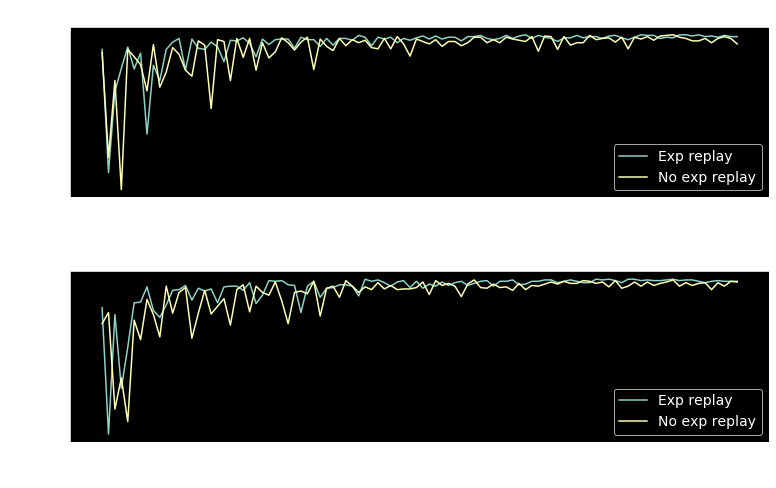

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1)

ax = axes[0]
total_rewards_Sarsa = Sarsa_RL._total_reward_per_epoch
total_rewards_Sarsa_no_exp_replay = Sarsa_RL_no_exp_replay._total_reward_per_epoch
ax.plot(total_rewards_Sarsa, label='Exp replay')
ax.plot(total_rewards_Sarsa_no_exp_replay, label='No exp replay')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total reward')
ax.legend(loc='lower right')
ax.title.set_text('SARSA')

ax = axes[1]
total_rewards_Q = Q_RL._total_reward_per_epoch
total_rewards_Q_no_exp_replay = Q_RL_no_exp_replay._total_reward_per_epoch
ax.plot(total_rewards_Q, label='Exp replay')
ax.plot(total_rewards_Q_no_exp_replay, label='No exp replay')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total reward')
ax.legend(loc='lower right')
ax.title.set_text('Q-learning')

plt.tight_layout()
plt.show()

### Windy Gridworld

In [11]:
n_h, n_v = 10, 10
terminal_state = (n_h-1, n_v-1)
Env = rl.WindyGridworld(n_h, n_v, terminal_state=terminal_state)
#Env.summary()

In [12]:
Sarsa_RL = rl.Sarsa(Agent=Bob, Environment=Env, params=params)
Q_RL = rl.QLearning(Agent=Bob, Environment=Env, params=params)

Sarsa_RL_no_exp_replay = rl.Sarsa(Agent=Bob, Environment=Env, params=params_no_exp_replay)
Q_RL_no_exp_replay = rl.QLearning(Agent=Bob, Environment=Env, params=params_no_exp_replay)

In [13]:
Sarsa_RL.learn(N_EPOCHS, init_state=init_state)
Q_RL.learn(N_EPOCHS, init_state=init_state)

Sarsa_RL_no_exp_replay.learn(N_EPOCHS, init_state=init_state)
Q_RL_no_exp_replay.learn(N_EPOCHS, init_state=init_state)

In [14]:
optimal_path, reward_history = Sarsa_RL.optimalPath(init_state)
Env.printPath(optimal_path, reward_history)

optimal_path, reward_history = Q_RL.optimalPath(init_state)
Env.printPath(optimal_path, reward_history)

[[  .   .   .   .   .   .   .   .   . -1.]
 [  .   .   .   .   .   . -1. -1. -1. -1.]
 [  .   .   .   .   . -1.   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   . -1.   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   . -1.   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  . -1. -1. -1. -1. -1.   .   .   .   .]
 [ 0. -1.   .   .   .   .   .   .   .   .]]
Total reward : -14
[[  .   .   .   .   .   . -1. -1. -1. -1.]
 [  .   .   .   .   . -1.   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   . -1.   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   . -1.   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   . -1.   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [ 0. -1. -1. -1. -1. -1.   .   .   .   .]]
Total reward : -13


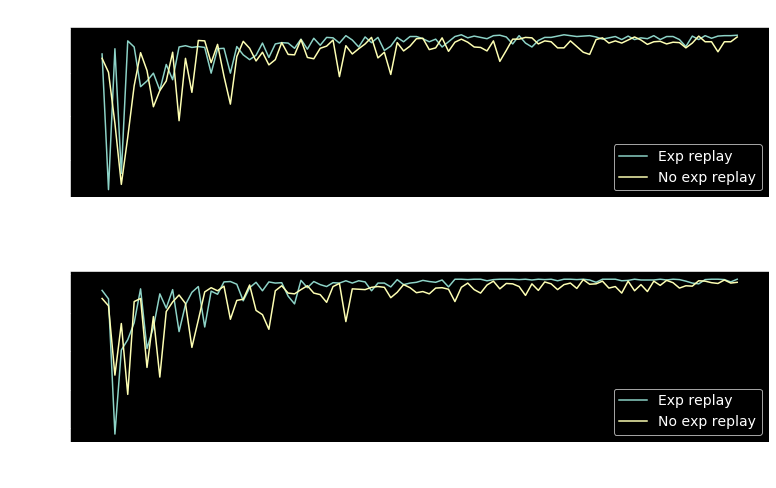

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1)

ax = axes[0]
total_rewards_Sarsa = Sarsa_RL._total_reward_per_epoch
total_rewards_Sarsa_no_exp_replay = Sarsa_RL_no_exp_replay._total_reward_per_epoch
ax.plot(total_rewards_Sarsa, label='Exp replay')
ax.plot(total_rewards_Sarsa_no_exp_replay, label='No exp replay')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total reward')
ax.legend(loc='lower right')
ax.title.set_text('SARSA')

ax = axes[1]
total_rewards_Q = Q_RL._total_reward_per_epoch
total_rewards_Q_no_exp_replay = Q_RL_no_exp_replay._total_reward_per_epoch
ax.plot(total_rewards_Q, label='Exp replay')
ax.plot(total_rewards_Q_no_exp_replay, label='No exp replay')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total reward')
ax.legend(loc='lower right')
ax.title.set_text('Q-learning')

plt.tight_layout()
plt.show()

### Cliff Gridworld

In [16]:
n_h, n_v = 10, 10
startover_state = (0, 0)
terminal_state = (n_h-1, 0)
Env = rl.CliffGridworld(n_h, n_v, terminal_state=terminal_state, startover_state=startover_state)
#Env.summary()
Env.printCliff()

[['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '*' '*' '*' '*' '*' '*' '*' '*' '.']]


In [17]:
Sarsa_RL = rl.Sarsa(Agent=Bob, Environment=Env, params=params)
Q_RL = rl.QLearning(Agent=Bob, Environment=Env, params=params)

Sarsa_RL_no_exp_replay = rl.Sarsa(Agent=Bob, Environment=Env, params=params_no_exp_replay)
Q_RL_no_exp_replay = rl.QLearning(Agent=Bob, Environment=Env, params=params_no_exp_replay)

In [18]:
Sarsa_RL.learn(N_EPOCHS, init_state=init_state)
Q_RL.learn(N_EPOCHS, init_state=init_state)

Sarsa_RL_no_exp_replay.learn(N_EPOCHS, init_state=init_state)
Q_RL_no_exp_replay.learn(N_EPOCHS, init_state=init_state)

See how Sarsa follows a safe path, away from the cliff, whereas Q-learning finds the optimal path, albeit more risky

In [19]:
optimal_path, reward_history = Sarsa_RL.optimalPath(init_state)
Env.printPath(optimal_path, reward_history)

optimal_path, reward_history = Q_RL.optimalPath(init_state)
Env.printPath(optimal_path, reward_history)

[[  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   . -1. -1. -1.   .   .   .   .   .]
 [  . -1. -1.   . -1. -1. -1. -1. -1. -1.]
 [-1. -1.   .   .   .   .   .   .   . -1.]
 [-1.   .   .   .   .   .   .   .   . -1.]
 [ 0.   .   .   .   .   .   .   .   . -1.]]
Total reward : -17
[[  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [  .   .   .   .   .   .   .   .   .   .]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.   .   .   .   .   .   .   .   . -1.]]
Total reward : -11


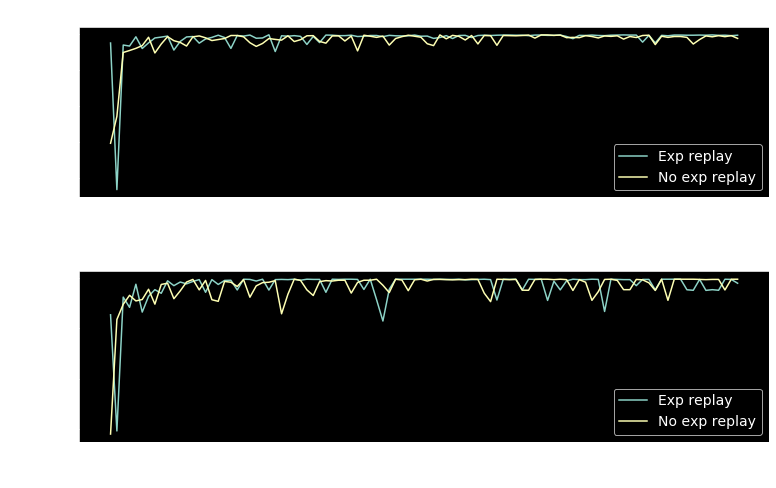

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1)

ax = axes[0]
total_rewards_Sarsa = Sarsa_RL._total_reward_per_epoch
total_rewards_Sarsa_no_exp_replay = Sarsa_RL_no_exp_replay._total_reward_per_epoch
ax.plot(total_rewards_Sarsa, label='Exp replay')
ax.plot(total_rewards_Sarsa_no_exp_replay, label='No exp replay')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total reward')
ax.legend(loc='lower right')
ax.title.set_text('SARSA')

ax = axes[1]
total_rewards_Q = Q_RL._total_reward_per_epoch
total_rewards_Q_no_exp_replay = Q_RL_no_exp_replay._total_reward_per_epoch
ax.plot(total_rewards_Q, label='Exp replay')
ax.plot(total_rewards_Q_no_exp_replay, label='No exp replay')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total reward')
ax.legend(loc='lower right')
ax.title.set_text('Q-learning')

plt.tight_layout()
plt.show()